# innomatics

In [16]:
import pandas as pd
df1 = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")
df1.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df1.shape

(9742, 3)

In [4]:
df2 = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
df2.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
df2.shape

(100836, 4)

In [14]:
len(df2.userId.unique())

610

In [17]:
merged_df = pd.merge(df1, df2, on='movieId')

# Display the merged dataframe

merged_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [18]:
# Which movie has recieved maximum number of user ratings?

df.title.value_counts()

title
Emma (1996)                               2
War of the Worlds (2005)                  2
Confessions of a Dangerous Mind (2002)    2
Eros (2004)                               2
Saturn 3 (1980)                           2
                                         ..
Lost and Delirious (2001)                 1
Rape Me (Baise-moi) (2000)                1
Alice (1990)                              1
Another Woman (1988)                      1
Andrew Dice Clay: Dice Rules (1991)       1
Name: count, Length: 9737, dtype: int64

In [19]:
import pandas as pd

# Load the data (assuming you have extracted and read the movies and ratings dataframes as shown earlier)
ratings_df =  pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df =  pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# List of target movie titles to check
target_movies = ['Matrix', 'Pulp Fiction', 'Forrest Gump', 'Shawshank Redemption']

# Filter the movies dataframe to get movieIds of the target movies
filtered_movies = movies_df[movies_df['title'].str.contains('|'.join(target_movies), case=False)]

# Merge ratings with filtered movies to get the number of ratings for each target movie
merged_df = pd.merge(ratings_df, filtered_movies, on='movieId')

# Count the number of ratings per movie
ratings_count = merged_df['title'].value_counts().reset_index()
ratings_count.columns = ['title', 'rating_count']

# Find the movie with the maximum number of user ratings
most_rated_movie = ratings_count.loc[ratings_count['rating_count'].idxmax()]

print(most_rated_movie)


title           Forrest Gump (1994)
rating_count                    329
Name: 0, dtype: object


In [24]:
filtered_movies

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4351,6365,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
4639,6934,"Matrix Revolutions, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
5669,27660,"Animatrix, The (2003)",Action|Animation|Drama|Sci-Fi


In [20]:
df3 =  pd.read_csv(r"C:\Users\91868\Downloads\movie_data\tags.csv")
df3.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [21]:
import pandas as pd

# Load the data (assuming the files are already extracted)
tags_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\tags.csv")
movies_df =pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Filter movies dataframe to find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].values[0]

# Filter tags dataframe to get all tags for "Matrix, The (1999)"
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag'].unique()

print(matrix_tags)


['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [22]:
import pandas as pd

# Load the ratings.csv and movies.csv files
ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]

# Filter the ratings dataframe to get all ratings for "Terminator 2: Judgment Day (1991)"
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

# Calculate the average rating for "Terminator 2: Judgment Day (1991)"
average_rating = terminator_ratings['rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is {average_rating:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is 3.97


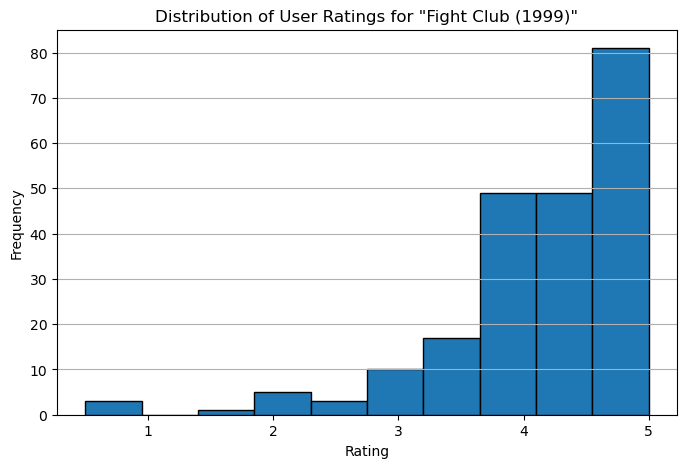

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data (assuming the files are already extracted)
ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].values[0]

# Filter the ratings dataframe to get all ratings for "Fight Club (1999)"
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

# Plot a histogram of the ratings for "Fight Club (1999)"
plt.figure(figsize=(8, 5))
plt.hist(fight_club_ratings['rating'], bins=10, edgecolor='black')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [25]:
import pandas as pd

ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Step 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Find the most popular movie based on average user ratings
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax()]
print(most_popular_movie[['title', 'rating_mean', 'rating_count']])


title           Shawshank Redemption, The (1994)
rating_mean                             4.429022
rating_count                                 317
Name: 277, dtype: object


In [26]:
import pandas as pd

ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Step 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Step 4: Find the top 5 most popular movies based on the number of user ratings
top_5_popular_movies = filtered_df.nlargest(5, 'rating_count')

# Check which of the given movies are in the top 5
given_movies = ["Pulp Fiction (1994)", "Bad Boys (1995)", "Silence of the Lambs, The (1991)", "Matrix, The (1999)"]
top_5_movie_titles = top_5_popular_movies['title'].tolist()

# Output the result
for movie in given_movies:
    if movie in top_5_movie_titles:
        print(f"{movie} is in the top 5.")
    else:
        print(f"{movie} is not in the top 5.")


Pulp Fiction (1994) is in the top 5.
Bad Boys (1995) is not in the top 5.
Silence of the Lambs, The (1991) is in the top 5.
Matrix, The (1999) is in the top 5.


In [35]:
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
)
ratings_grouped

,rating_count,rating_mean
movieId,,
1,215,3.920930
2,110,3.431818
3,52,3.259615
4,7,2.357143
5,49,3.071429
...,...,...
193581,1,4.000000
193583,1,3.500000
193585,1,3.500000


In [40]:
import pandas as pd

ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Step 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]

# Step 4: Filter for Sci-Fi movies (assumes the genre column contains 'Sci-Fi')
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

# Step 5: Find the third most popular Sci-Fi movie based on the number of user ratings
third_most_popular_sci_fi_movie = sci_fi_movies.nlargest(3, 'rating_count').iloc[2]

# Output the result
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])


title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [41]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan


In [44]:
pip show requests

Name: requests
Version: 2.31.0
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache 2.0
Location: C:\Users\91868\anaconda3\Lib\site-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: anaconda-catalogs, anaconda-client, anaconda-cloud-auth, anaconda-project, chromadb, conda, conda-build, conda-repo-cli, conda_package_streaming, cookiecutter, dash, datasets, datashader, google-api-core, huggingface-hub, intake, jupyterlab_server, kubernetes, langchain, langchain-community, langsmith, panel, posthog, pycaret, requests-file, requests-oauthlib, requests-toolbelt, responses, Sphinx, streamlit, tensorflow-intel, tiktoken, tldextract, transformers, ydata-profiling, yfinance
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip show bs4

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install bs4

In [48]:
# We thought of giving you a gift this new year by sharing the web scraping script
# Understanding the script before using is always appreciated
# We left few blanks in the script for your exploration
# Make sure to replace FILL_IN_THE_BLANK in the code to make it work
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

In [64]:
links_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\links.csv")
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [55]:
links_df['imdbId'].tolist()

[114709,
 113497,
 113228,
 114885,
 113041,
 113277,
 114319,
 112302,
 114576,
 113189,
 112346,
 112896,
 112453,
 113987,
 112760,
 112641,
 114388,
 113101,
 112281,
 113845,
 113161,
 112722,
 112401,
 114168,
 113627,
 114057,
 114011,
 114117,
 112682,
 115012,
 112792,
 114746,
 112431,
 112818,
 113442,
 112697,
 112749,
 114279,
 112819,
 114272,
 113855,
 114681,
 113347,
 114369,
 114148,
 114916,
 114814,
 113819,
 110299,
 112499,
 113158,
 113321,
 110877,
 113419,
 116260,
 113862,
 116126,
 118002,
 115683,
 116839,
 113149,
 113118,
 116367,
 113010,
 113537,
 113828,
 115644,
 115676,
 114367,
 113973,
 112744,
 116731,
 112445,
 114660,
 112379,
 114039,
 112365,
 118158,
 116151,
 115697,
 113972,
 117002,
 114825,
 115639,
 115759,
 113403,
 113247,
 113283,
 115907,
 115734,
 117102,
 118040,
 116483,
 112579,
 110251,
 117110,
 112646,
 112573,
 75314,
 113326,
 115645,
 112373,
 115033,
 116606,
 114536,
 106473,
 103859,
 109424,
 116324,
 110647,
 110217,
 1

In [59]:
links_df[links_df['imdbId']==114709]['movieId']

0    1
Name: movieId, dtype: int64

In [60]:
for imdbvalue in links_df['imdbId'].tolist():
    print(links_df[links_df['imdbId']==imdbvalue]['movieId'], imdbvalue,scrapper(imdbvalue))

0    1
Name: movieId, dtype: int64 114709 nan
1    2
Name: movieId, dtype: int64 113497 nan
2    3
Name: movieId, dtype: int64 113228 nan
3    4
Name: movieId, dtype: int64 114885 nan
4    5
Name: movieId, dtype: int64 113041 nan
5    6
Name: movieId, dtype: int64 113277 nan
6    7
Name: movieId, dtype: int64 114319 nan
7    8
Name: movieId, dtype: int64 112302 nan
8    9
Name: movieId, dtype: int64 114576 nan
9    10
Name: movieId, dtype: int64 113189 nan
10    11
Name: movieId, dtype: int64 112346 nan
11    12
Name: movieId, dtype: int64 112896 nan
12    13
Name: movieId, dtype: int64 112453 nan
13    14
Name: movieId, dtype: int64 113987 nan
14    15
Name: movieId, dtype: int64 112760 nan
15    16
Name: movieId, dtype: int64 112641 nan
16    17
Name: movieId, dtype: int64 114388 nan
17    18
Name: movieId, dtype: int64 113101 nan
18    19
Name: movieId, dtype: int64 112281 nan
19    20
Name: movieId, dtype: int64 113845 nan
20    21
Name: movieId, dtype: int64 113161 nan
21    22
Na

KeyboardInterrupt: 

In [65]:
import pandas as pd

ratings_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\ratings.csv")
movies_df = pd.read_csv(r"C:\Users\91868\Downloads\movie_data\movies.csv")

# Step 1: Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings
ratings_grouped = ratings_df.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    rating_mean=('rating', 'mean')
).reset_index()

# Step 2: Apply inner join on movies dataframe and the grouped ratings dataframe
merged_df = pd.merge(movies_df, ratings_grouped, on='movieId', how='inner')

# Step 3: Filter only those movies which have more than 50 user ratings
filtered_df = merged_df[merged_df['rating_count'] > 50]
filtered_df

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [66]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [73]:
final_df = pd.merge(filtered_df, links_df,on='movieId', how='left')

In [74]:
for imdbvalue in final_df['imdbId'].tolist():
    print(imdbvalue,scrapper(imdbvalue))

114709 nan
113497 nan
113228 nan
113277 nan
114319 nan
113189 nan
112346 nan
112641 nan
114388 nan
112281 nan
113161 nan
113627 nan
114746 nan
112431 nan
112818 nan
112697 nan
114369 nan
114148 nan
114814 nan
113862 nan
116367 nan
115759 nan
116483 nan
112573 nan
75314 nan
115685 nan
112442 nan
112384 nan
112462 nan
112642 nan
112715 nan
112740 nan
112851 nan
112864 nan
113071 nan
113481 nan
113492 nan
113957 nan
114898 nan
109445 nan
109635 nan
109686 nan
109707 nan
110148 nan
76759 nan
110322 nan
110632 nan
114069 nan
110413 nan
110912 nan
110932 nan
111282 nan
111070 nan
111161 nan
111280 nan
108550 nan
114924 nan
109040 nan
109444 nan
109446 nan
109506 nan
109830 nan
109831 nan
110357 nan
110475 nan
110478 nan
110622 nan
111257 nan
111503 nan
106220 nan
109254 nan
109439 nan
106582 nan
106598 nan
106673 nan
106697 nan
106918 nan
106977 nan
107144 nan
107206 nan
107290 nan
107362 nan
107614 nan
107818 nan
107822 nan
107977 nan
108052 nan
108160 nan
83658 nan
107688 nan
108333 nan
10

KeyboardInterrupt: 

In [75]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [76]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_rating(url):
    # Set up the request header
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    # Send the HTTP request
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the IMDb rating
        imdb_rating = soup.find('span', itemprop='ratingValue')
        
        # Return the rating text if found, otherwise return 'Not Found'
        return imdb_rating.text if imdb_rating else 'Not Found'
    else:
        return 'Request Failed'

# Example URL
url = "https://www.imdb.com/title/tt0114709"
rating = scrape_imdb_rating(url)
print(f"IMDb Rating: {rating}")

IMDb Rating: Not Found


In [77]:
import requests
from bs4 import BeautifulSoup

def scrape_imdb_rating(url):
    # Set up the request header
    headers = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    
    # Send the HTTP request
    response = requests.get(url, headers=headers)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Find the IMDb rating
        imdb_rating = soup.find('span', {'class': 'sc-16r8icm-2'})

        # Return the rating text if found, otherwise return 'Not Found'
        return imdb_rating.text.strip() if imdb_rating else 'Not Found'
    else:
        return 'Request Failed'

# Example URL
url = "https://www.imdb.com/title/tt0114709"
rating = scrape_imdb_rating(url)
print(f"IMDb Rating: {rating}")

IMDb Rating: Not Found


In [ ]:
imdb_rating = soup.find('FILL_IN_THE_BLANK', attrs={'FILL_IN_THE_BLANK' : 'FILL_IN_THE_BLANK'})
    return imdb_rating.text if imdb_rating else np.nan

In [78]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.BeautifulSoup(URL, headers=request_header)
    soup = BeautifulSoup(response.text)
    return soup

In [79]:
scrapper(114709)

AttributeError: module 'requests' has no attribute 'BeautifulSoup'

In [80]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'class': 'sc-bde20123-1 iZlgcd'})
    return imdb_rating.text if imdb_rating else np.nan

In [81]:
scrapper(114709)

nan

In [92]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()  # Raise an exception for bad status codes
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Try multiple potential class names
        potential_classes = ['sc-eb51e184-1 ijxVSS', 'sc-bde20123-1 iZlgcd', 'ipc-button__text']
        
        for class_name in potential_classes:
            imdb_rating = soup.find('span', class_=class_name)
            if imdb_rating:
                return imdb_rating.text.strip()
        
        # If no matching classes found, try finding by nearby text
        rating_section = soup.find('div', string=lambda text: 'IMDb RATING' in text if text else False)
        if rating_section:
            rating = rating_section.find_next('span', class_=lambda x: x and 'rating' in x.lower())
            if rating:
                return rating.text.strip()
        
        # If still not found, print part of the page content for debugging
        print("Debug: Unable to find rating. Here's a sample of the page content:")
        print(soup.prettify()[:1000])  # Print first 1000 characters of the parsed HTML
        
        return np.nan
    
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
        return np.nan

# Example usage
toy_story_id = 113228  # IMDb ID for Toy Story
rating = scrapper(toy_story_id)
print(f"The IMDb rating for Toy Story is: {rating}")

The IMDb rating for Toy Story is: 7.0


In [86]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [90]:
links_df.columns

Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')

Debug: Unable to find rating. Here's a sample of the page content:
<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1725098644491);
        }
    })
  </script>
  <title>
   Toy Story (1995) - IMDb
  </title>
  <meta content="Toy Story: Directed by John Lasseter. With Tom Hanks, Tim Allen, Don Rickles, Jim Varney. A cowboy doll is pro

In [93]:
filtered_df.head()

,movieId,title,genres,rating_count,rating_mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185


In [95]:
final_df = pd.merge(filtered_df, links_df,on='movieId', how='left')
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [110]:
final_df.head()

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0


In [ ]:
fi

In [102]:
import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Try multiple potential class names
        potential_classes = ['sc-bde20123-1 iZlgcd', 'sc-52d569c6-1 kxWkHm', 'ipc-button__text']
        
        for class_name in potential_classes:
            imdb_rating = soup.find('span', class_=class_name)
            if imdb_rating:
                return imdb_rating.text.strip()
        
        # If no matching classes found, try finding by nearby text
        rating_section = soup.find('div', string=lambda text: 'IMDb RATING' in text if text else False)
        if rating_section:
            rating = rating_section.find_next('span', class_=lambda x: x and 'rating' in x.lower())
            if rating:
                return rating.text.strip()
        
        return np.nan
    
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
        return np.nan

# Example usage
toy_story_id = 116213  # IMDb ID for Toy Story
rating = scrapper(toy_story_id)
print(f"The IMDb rating for Toy Story is: {rating}")

The IMDb rating for Toy Story is: 5.9


In [109]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import time
import re

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Method 1: Using JSON-LD script
        script = soup.find('script', {'type': 'application/ld+json'})
        if script:
            data = script.string
            match = re.search(r'"ratingValue":\s*"(\d+\.\d+)"', data)
            if match:
                return float(match.group(1))
        
        # Method 2: Direct HTML parsing
        rating_div = soup.find('div', {'data-testid': 'hero-rating-bar__aggregate-rating__score'})
        if rating_div:
            rating_span = rating_div.find('span')
            if rating_span:
                return float(rating_span.text)
        
        # If both methods fail, print debug info
        print(f"Debug: Unable to find rating for {URL}")
        print("HTML Content:")
        print(soup.prettify()[:1000])  # Print first 1000 characters of HTML
        
        return np.nan
    
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
        return np.nan

# Example usage with multiple movies and delay
movie_ids = [113277]  # Toy Story, The Shawshank Redemption, The Dark Knight
for movie_id in movie_ids:
    rating = scrapper(movie_id)
    print(f"The IMDb rating for movie ID {movie_id} is: {rating}")
    time.sleep(2)  # Add a 2-second delay between requests

The IMDb rating for movie ID 113277 is: 8.3


In [111]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import time
import re

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    try:
        response = requests.get(URL, headers=request_header)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Method 1: Using JSON-LD script
        script = soup.find('script', {'type': 'application/ld+json'})
        if script:
            data = script.string
            match = re.search(r'"ratingValue":\s*"(\d+\.\d+)"', data)
            if match:
                return float(match.group(1))
        
        # Method 2: Direct HTML parsing
        rating_div = soup.find('div', {'data-testid': 'hero-rating-bar__aggregate-rating__score'})
        if rating_div:
            rating_span = rating_div.find('span')
            if rating_span:
                return float(rating_span.text)
        
        # If both methods fail, print debug info
        print(f"Debug: Unable to find rating for {URL}")
        print("HTML Content:")
        print(soup.prettify()[:1000])  # Print first 1000 characters of HTML
        
        return np.nan
    
    except requests.RequestException as e:
        print(f"Error fetching the page: {e}")
        return np.nan

# Assuming final_df is your DataFrame with an 'imdbId' column
# If you don't have final_df defined, you can create a sample one like this:
# final_df = pd.DataFrame({'imdbId': [113277, 114709, 111161]})

# Apply the scrapper function to each imdbId and store the result in a new column
final_df['imdb_rating'] = final_df['imdbId'].apply(lambda x: scrapper(x))

# Add a delay between requests to avoid overloading the server
time.sleep(2)

# Print the updated DataFrame
print(final_df)

# Optionally, you can save the updated DataFrame to a CSV file
# final_df.to_csv('updated_movie_ratings.csv', index=False)

     movieId                             title  \
0          1                  Toy Story (1995)   
1          2                    Jumanji (1995)   
2          3           Grumpier Old Men (1995)   
3          6                       Heat (1995)   
4          7                    Sabrina (1995)   
..       ...                               ...   
431   106782   Wolf of Wall Street, The (2013)   
432   109374  Grand Budapest Hotel, The (2014)   
433   109487               Interstellar (2014)   
434   112852    Guardians of the Galaxy (2014)   
435   122904                   Deadpool (2016)   

                                          genres  rating_count  rating_mean  \
0    Adventure|Animation|Children|Comedy|Fantasy           215     3.920930   
1                     Adventure|Children|Fantasy           110     3.431818   
2                                 Comedy|Romance            52     3.259615   
3                          Action|Crime|Thriller           102     3.946078   
4   

In [112]:
final_df

,movieId,title,genres,rating_count,rating_mean,imdbId,tmdbId,imdb_rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0,8.3
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0,7.1
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0,6.7
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0,8.3
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0,6.3
...,...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0,8.2
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0,8.1
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0


In [113]:
final_df.columns

Index(['movieId', 'title', 'genres', 'rating_count', 'rating_mean', 'imdbId',
       'tmdbId', 'imdb_rating'],
      dtype='object')

In [114]:
import pandas as pd

# Assuming final_df is already loaded with the data

# 1. Mention the movieId of the movie which has the highest IMDB rating
highest_rated_movie = final_df.loc[final_df['imdb_rating'].idxmax()]
print(f"The movieId of the movie with the highest IMDB rating is: {highest_rated_movie['movieId']}")
print(f"Its IMDB rating is: {highest_rated_movie['imdb_rating']}")

# 2. Mention the movieId of the "Sci-Fi" movie which has the highest IMDB rating
# First, we need to filter for Sci-Fi movies
sci_fi_movies = final_df[final_df['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Then, find the Sci-Fi movie with the highest IMDB rating
highest_rated_scifi = sci_fi_movies.loc[sci_fi_movies['imdb_rating'].idxmax()]
print(f"\nThe movieId of the Sci-Fi movie with the highest IMDB rating is: {highest_rated_scifi['movieId']}")
print(f"Its IMDB rating is: {highest_rated_scifi['imdb_rating']}")

# Optional: Display more information about these movies
print(f"\nHighest rated movie overall:")
print(highest_rated_movie[['movieId', 'title', 'genres', 'imdb_rating']])

print(f"\nHighest rated Sci-Fi movie:")
print(highest_rated_scifi[['movieId', 'title', 'genres', 'imdb_rating']])

The movieId of the movie with the highest IMDB rating is: 318
Its IMDB rating is: 9.3

The movieId of the Sci-Fi movie with the highest IMDB rating is: 79132
Its IMDB rating is: 8.8

Highest rated movie overall:
movieId                                     318
title          Shawshank Redemption, The (1994)
genres                              Crime|Drama
imdb_rating                                 9.3
Name: 53, dtype: object

Highest rated Sci-Fi movie:
movieId                                                  79132
title                                         Inception (2010)
genres         Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
imdb_rating                                                8.8
Name: 424, dtype: object


In [115]:
final_df.to_csv('final_df.csv', index=False)